<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png" width=15% align=left> <br><br>
<img src="https://static01.nyt.com/images/2021/04/24/multimedia/20sp-currents-planes-illo/20sp-currents-planes-illo-superJumbo.gif?quality=75&auto=webp">


# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. EDA & Data Preparing](#Data-Prep)
* [3. Machine Learning Models](#ml-models)
* [4. Deployment of Model](#model-deployment)


# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>
    
>**1.1 Problem Statement**<br>
>- A flight delay is when an airline flight takes off and/or lands later than its scheduled time. The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. The Flight Delay Prediction finds the probability that a specific flight will be delayed or not. It is a binary classification problem where 1 refers to delay status and 0 is on time. The flight can be delayed due to multiple reason as below

<img src= "https://www.faa.gov/sites/faa.gov/files/images/delay.jpg">

>**1.2 Importance of the Analysis**<br>
>-  US airline passengers increasingly have access to flight delay information. As a result, air passenger travel decisions can be expected to be influenced by delay information. In addition, delays affect airline operations, resulting in increased block times on routes and, in general, higher carrier costs and airfares. Hence, there is a high requirement of predicitng the flight status in aviation industry.

>**1.3 Stakeholders**<br> 
>- For this problem, Airline is the key stakeholders, as they will detect whether a flight is on time or not. This helps in saving a lot of time and cost. This analysis can be helful to other stakeholders like FAA or traveling agencies 

>**1.4 End Goal**<br>
>- Accurate analysis, testing and classification of flight status and back the story by data provided.    

* [Go to Top](#table-of-content)

# 2. EDA & Data Preparation <a class="anchor" id="Data-Prep"></a>


#### Importing the Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
>- Pandas : 
Used for data manipluation. Refer to Pandas Cheatsheet : https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python <br>
>- Scikit-learn :
Useful and robust library for machine learning. Refer to SKlearn documentation : https://scikit-learn.org/stable/user_guide.html
>- class_perf_measures() : A custom function, which calculates the mean of the target variable w.r.t to every categorical variable type and give the difference 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.05).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1 Score" : F1
                          })

    # Let's look at our dataframe
    return result

#### Reading the data   <a class="anchor" id="read-data"></a>
>- Link for reading multiple types of input files https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
>- Note: Shift+Tab to look at the parameters any function can take/documentation
* [Go to Top](#table-of-content)

In [2]:
#Reading the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('FlightDelays_Clean.csv') 
#df.head() #df.tail()

#### Descriptive Analysis <a class="anchor" id="EDA"></a>
There are some common steps followed during any analysis however, may differ data to data. Keep following in mind:

- [Initial Evaluation](#initial-evaluation)
- [Initial Cleanup - dupes, missing values](#missing-values)
- [Outlier Detection & Treatment](#outliers)
- [Feature Selection](#feature-selection)
- [Data Partitioning](#data-split)
- [Data Normalization](#normalization)



* [Go to Top](#table-of-content)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status_delayed       2201 non-null   int64  
 1   sch_dep_time         2201 non-null   float64
 2   carrier_delta        2201 non-null   int64  
 3   carrier_us           2201 non-null   int64  
 4   carrier_envoy        2201 non-null   int64  
 5   carrier_continental  2201 non-null   int64  
 6   carrier_discovery    2201 non-null   int64  
 7   carrier_other        2201 non-null   int64  
 8   dest_jfk             2201 non-null   int64  
 9   dest_ewr             2201 non-null   int64  
 10  dest_lga             2201 non-null   int64  
 11  distance             2201 non-null   int64  
 12  origin_dca           2201 non-null   int64  
 13  origin_iad           2201 non-null   int64  
 14  origin_bwi           2201 non-null   int64  
 15  bad_weather          2201 non-null   i

### Initial Observations
>- **Rows- 2201 & Columns- 23** (1: float, 22: int)
>- **Data Interpretation** <br><br>
| #  | Column              |                    Comments                   |   |   |
|----|---------------------|:---------------------------------------------:|:-:|---|
|    |                     |                                               |   |   |
| 0  | status_delayed      | Whether the flight is delayed or not (binary) |   |   |
| 1  | sch_dep_time        | Flight Departure time                         |   |   |
| 2  | carrier_delta       | Carrier/Airline Type                          |   |   |
| 3  | carrier_us          | Carrier/Airline Type                          |   |   |
| 4  | carrier_envoy       | Carrier/Airline Type                          |   |   |
| 5  | carrier_continental | Carrier/Airline Type                          |   |   |
| 6  | carrier_discovery   | Carrier/Airline Type                          |   |   |
| 7  | carrier_other       | Carrier/Airline Type                          |   |   |
| 8  | dest_jfk            | Destination name (most likely)                |   |   |
| 9  | dest_ewr            | Destination name (most likely)                |   |   |
| 10 | dest_lga            | Destination name (most likely)                |   |   |
| 11 | distance            | Distance in miles                             |   |   |
| 12 | origin_dca          | flight take off/origin place (categorical converted to dummy while cleaning)  |   |   |
| 13 | origin_iad          | flight take off/origin place (categorical converted to dummy while cleaning)  |   |   |
| 14 | origin_bwi          | flight take off/origin place (categorical converted to dummy while cleaning)  |   |   |
| 15 | bad_weather         | Weather forecast                              |   |   |
| 16 | Monday              | Week-day                                      |   |   |
| 17 | Tuesday             | Week-day                                      |   |   |
| 18 | Wednesday           | Week-day                                      |   |   |
| 19 | Thursday            | Week-day                                      |   |   |
| 20 | Friday              | Week-day                                      |   |   |
| 21 | Saturday            | Week-day                                      |   |   |
| 22 | Sunday              | Week-day                                      |   |   |
>- **Target Variable: status_delayed** <br>

In [4]:
df.describe()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00
mean,0.19,13.86,0.18,0.18,0.13,0.04,0.25,0.21,0.18,0.30,0.52,211.87,0.62,0.31,0.07,0.01,0.14,0.15,0.17,0.18,0.11,0.11,0.14
std,0.40,4.32,0.38,0.39,0.34,0.20,0.43,0.41,0.38,0.46,0.50,13.32,0.48,0.46,0.25,0.12,0.35,0.35,0.37,0.38,0.32,0.32,0.35
min,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,169.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,213.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,14.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,214.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,17.17,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,214.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,21.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,229.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Missing & Duplicates Records

* [Go to Top](#table-of-content)

In [5]:
#counting the duplicates
print(df.duplicated().value_counts())                             
df.shape                                                          

True     1319
False     882
dtype: int64


(2201, 23)

In [6]:
#Finding and treating missing values
df.isnull().sum()                                                 

status_delayed         0
sch_dep_time           0
carrier_delta          0
carrier_us             0
carrier_envoy          0
carrier_continental    0
carrier_discovery      0
carrier_other          0
dest_jfk               0
dest_ewr               0
dest_lga               0
distance               0
origin_dca             0
origin_iad             0
origin_bwi             0
bad_weather            0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
Friday                 0
Saturday               0
Sunday                 0
dtype: int64

#### Outlier Detection and Treatment 

* [Go to Top](#table-of-content)

In [7]:
#working on numerical columns first
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

In [8]:
pd.DataFrame(dict(mean = df_numeric.mean().round(2),
                  median = df_numeric.median().round(2),
                  std_dev = df_numeric.std().round(2),
                  min_val = df_numeric.min(),
                  max_val = df_numeric.max(),
                  missing_vals = df_numeric.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
status_delayed,0.19,0.00,0.40,0.00,1.00,0
sch_dep_time,13.86,14.92,4.32,6.00,21.50,0
carrier_delta,0.18,0.00,0.38,0.00,1.00,0
carrier_us,0.18,0.00,0.39,0.00,1.00,0
carrier_envoy,0.13,0.00,0.34,0.00,1.00,0
carrier_continental,0.04,0.00,0.20,0.00,1.00,0
carrier_discovery,0.25,0.00,0.43,0.00,1.00,0
carrier_other,0.21,0.00,0.41,0.00,1.00,0
dest_jfk,0.18,0.00,0.38,0.00,1.00,0
dest_ewr,0.30,0.00,0.46,0.00,1.00,0


## Feature Selection

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'.(dropping the sensitive data)
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future

* [Go to Top](#table-of-content)

In [9]:
target = ['status_delayed']

In [10]:
X = df.drop(target,axis=1)
y = df[target]

In [11]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>

* [Go to Top](#table-of-content)

#### Normalize predictor variables using Z-Scores.
 Use means and standard deviations of features as calculated in the TRAINING DATA
 New values are centered at 0.  Values reflect the number of standard deviations
 each record is above or below the mean.

In [12]:
features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

In [13]:
features_means.values

array([1.38913182e+01, 1.81168831e-01, 1.82467532e-01, 1.38311688e-01,
       4.09090909e-02, 2.52597403e-01, 2.04545455e-01, 1.81168831e-01,
       3.00649351e-01, 5.18181818e-01, 2.11988312e+02, 6.29870130e-01,
       3.09090909e-01, 6.10389610e-02, 1.62337662e-02, 1.31818182e-01,
       1.45454545e-01, 1.75974026e-01, 1.79220779e-01, 1.22077922e-01,
       1.12337662e-01, 1.33116883e-01])

In [14]:
features_std.values

array([ 4.30692485,  0.38528311,  0.38635484,  0.34533897,  0.19814397,
        0.4346431 ,  0.4035001 ,  0.38528311,  0.45868937,  0.49983162,
       12.93372393,  0.4829961 ,  0.46226884,  0.23947953,  0.12641443,
        0.33840288,  0.35267306,  0.38092176,  0.38366167,  0.32748213,
        0.31588401,  0.33981136])

### Initial Summary:

>- Dataframe - (2201,23)
>-Target Variable -status_delayed
>-Mising Values - No
>- Duplicates - Yes (not removing them, a per the data, same flight by an airline can be delayed or on time on the given week day 
>-Outliers - No major skewness in the data, will circle back if needed
>-Feature Selection - Including everthing for now
>-Data Normalisation - Essential for KNN model

* [Go to Top](#table-of-content)

## Machine Learning Models <a class="anchor" id="ml-models"></a>

> **Model 1 - kNN** <a class="anchor" id="first-model"></a>
<br>
>To do:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy using the plot

In [15]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]: #np.arange(1,45):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'recall':metrics.recall_score(y_test,y_pred_class),
                    'precision':metrics.precision_score(y_test,y_pred_class)
                   
                                                      
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy,recall,precision
0,1,0.75,0.36,0.35
1,3,0.78,0.26,0.38
2,5,0.80,0.18,0.44
3,7,0.79,0.16,0.38
4,9,0.80,0.11,0.41
5,11,0.80,0.11,0.44
6,13,0.79,0.08,0.33
7,15,0.81,0.08,0.45
8,17,0.81,0.07,0.50
9,19,0.81,0.07,0.50


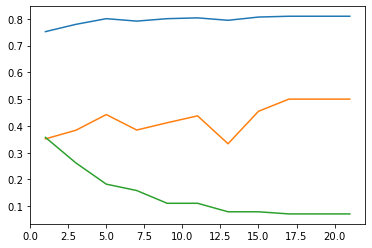

In [16]:
plt.plot(results_df['k'],results_df['accuracy'])
plt.plot(results_df['k'],results_df['precision'])
plt.plot(results_df['k'],results_df['recall'])

>**Decision:**<br>
Observation 1: Based on the results above, setting number of neighbors (k) to 5 as this is the lowest value that achieves the highest accuracy value. 
Ibservation 2: With k= 15, the precision and recall performance is worse than k = 5. To consider a trade off between these evaluation metrics, I set my **k = 5**.

<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of KNN, we will produce a table of performance measures across a range of probability threshold values or can be seen from the plot that post k=5, the accuracy started dropping

In [17]:
knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform')
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.8


In [18]:
class_perf_measures(knn,X_test,y_test)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.05,109,157,378,17,0.22,0.86,0.40,0.36
2,0.10,109,157,378,17,0.22,0.86,0.40,0.36
3,0.15,91,289,246,35,0.27,0.72,0.57,0.39
4,0.20,91,289,246,35,0.27,0.72,0.57,0.39
5,0.25,64,416,119,62,0.35,0.51,0.73,0.41
6,0.30,64,416,119,62,0.35,0.51,0.73,0.41
7,0.35,32,481,54,94,0.37,0.25,0.78,0.30
8,0.40,32,481,54,94,0.37,0.25,0.78,0.30
9,0.45,14,515,20,112,0.41,0.11,0.80,0.18


Overview of the Knn class performance for k = 5 <br>
threshold: ranges from 0-1, is the probability for selecting the 1 class which is loan approved <br>
TP, TN, FP & FN are the classes which will be discussed in details below <br>
Recall : 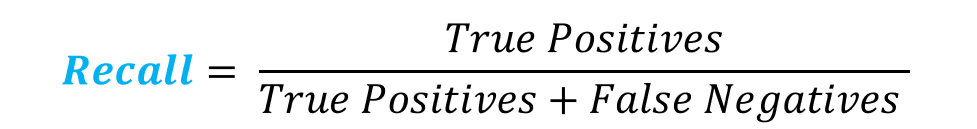
Precision : 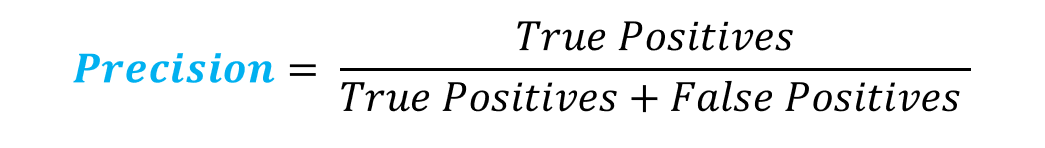

> **Model 2 - Logistics** <a class="anchor" id="second-model"></a>
<br>
>To do:<br>
>1. Fit the model. <br>

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


In [20]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.05,121,35,500,5,0.20,0.96,0.24,0.32
2,0.10,111,142,393,15,0.22,0.88,0.38,0.35
3,0.15,89,238,297,37,0.23,0.71,0.49,0.35
4,0.20,74,342,193,52,0.28,0.59,0.63,0.38
5,0.25,59,422,113,67,0.34,0.47,0.73,0.40
6,0.30,39,472,63,87,0.38,0.31,0.77,0.34
7,0.35,21,504,31,105,0.40,0.17,0.79,0.24
8,0.40,15,520,15,111,0.50,0.12,0.81,0.19
9,0.45,9,529,6,117,0.60,0.07,0.81,0.13


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

* [Go to Top](#table-of-content)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


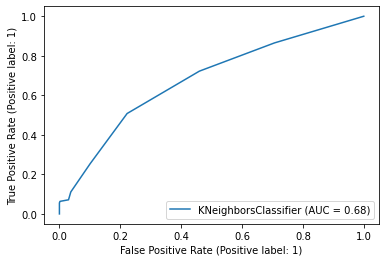

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


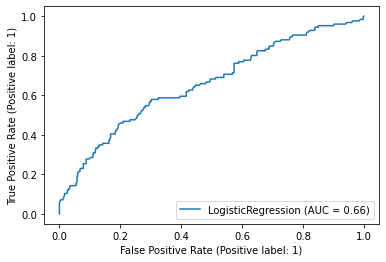

In [21]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our KNN Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

### KNN Model class performance evaluation
**Confusion Matrix**

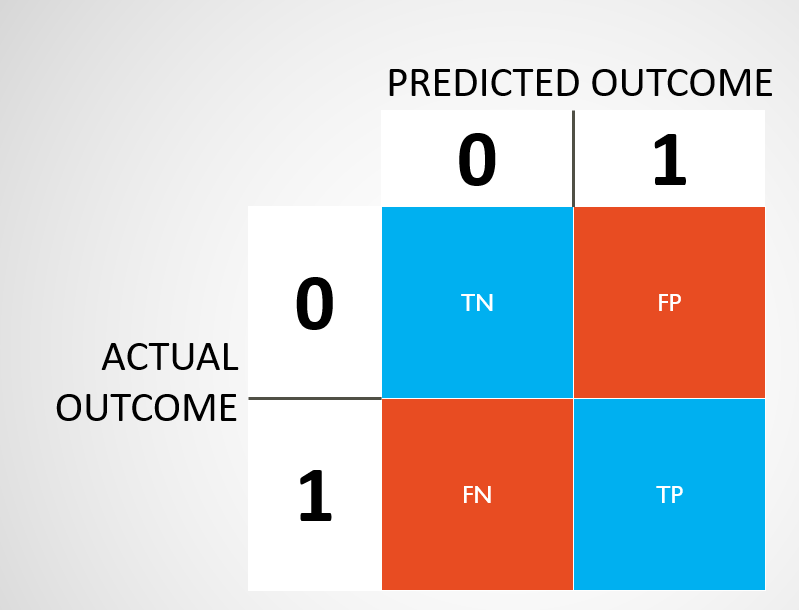

1. **Prob Threshold = 0.8** (High threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Delay    | Delay    |   |
| Actuals | Not Delay    | 535          | **0**  |   |
|         | Delay        | **119**       | 07       |   |

>- **Interpretation**: The model accurately predicts (by a measure of 82%) whether the flight is delayed or not. Since Accuracy is not the paramount in this problem from the airline perspective, the agenda is to reduce the delayed flights and increase the customer satisfaction. With high threshold, it is expected to have more not delays prediction (FN + FP).In our case "positive" means "flight is delayed."  <br>
Precision :Out of all the flights delayed the model predicted, 100% of the times it was actually delayed (TP- 07). 
Recall : Out of all the flights that were delayed, our model was able to correctly identify only 6% of them, which is extremely poor.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model classified the flight as delayed when it was on time, we see no Fasle positive (FP) class with this high threshold. The model will not predict any flight as delayed. It's business impact can be harmful as we are not predicting any flight a delayed, it is better to flip a coin in this case as our model is not predicting anything. 
It means that no measure is taken in minimising the loss that might occur due to delayed flights can be very expensive. 

>- **False Negative FNs & Business Impact** - with no FP, it is expected to have LOT more FN class - 119. It implies that with 0.8 threshold, the airline will not predict 95% of the delayed flight and will take no measures. It extremely is a loss of huge business as it can involve following cost: 
>- 1. Not being able to predict the flight delay status leads to high number of passenger claiming for refund/insurance
>- 2. According to Aviation policies, airline needs to provide free accomodation on no prior communication on delayed flights
>- 3. Poor customer statisfaction leads to business losses 
>- 4. It leads to bad air traffic management and penalties in worst cases by aviation ministry
>- 5. Addtional cost of Runway wait time, halted operations, additional staff & crew members <br>
Therefore, False Negatives are more costlier that False Positive in predicting flight status

**Conclusion** Since our goal is to minimise the False Negative i.e. **minimising predicting the flight as Not Delay when it is actually delayed**, hence we will move to the next threshold
    
<br><br>

2. **Prob Threshold = 0.6** (intermediate threshold): 


|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Delay    | Delay    |   |
| Actuals | Not Delay    | 519          | **16**  |   |
|         | Delay        | **117**       | 09       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 80%) whether the flight is delayed or on time. As accuracy is not the paramount in this problem since for a bank, tthe agenda is to reduce the delayed flights and increase the customer satisfaction. With high threshold, it is expected to have more not delays prediction (FN + FP) <br>
Precision :Out of all the flights delayed the model predicted, only 36% of the times it was actually delayed (TP- 09), which is slight more than 0.8 threshold where there were no delays predited. Since the total delay prediction is very less overall, the precisio does not make a lot of sense. 
Recall : Out of all the flights that were delayed, our model was able to correctly identify only 7% of them, which is extremely poor.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model classified the flight as delayed when it was on time, we do not see a lot of Fasle positive (FP) class with this threshold, which is good. BUT that meams more FN, i.e. more incorrect prediciton as Not Delay when the flight is actually delayed. It's business impact are equally harmful for both the threshold (0.8 & 0.6) as we are not predicting any flight a delayed. 
It means that there will be cost involved in rescheduling the flight, managing air traffic, further reschdule for the day and operations when it is not even needed. 

>- **False Negative FNs & Business Impact** - with less FP, it is expected to have more FN class - 117. It implies that with 0.6 threshold, the airline will not predict 92% of the delayed flight and will take no measures. It extremely is a loss of huge business as it can involve following cost: 
>- 1. Not being able to predict the flight delay status leads to high number of passenger claiming for refund/insurance
>- 2. According to Aviation policies, airline needs to provide free accomodation on no prior communication on delayed flights
>- 3. Poor customer statisfaction leads to business losses 
>- 4. It leads to bad air traffic management and penalties in worst cases by aviation ministry
>- 5. Addtional cost of Runway wait time, halted operations, additional staff & crew members <br>
Therefore, False Negatives are more costlier that False Positive in predicting flight status

>- **Comparison** : 
>- Even though, we do see slight improvement in FN at 0.6 threshold as compared to the 0.8 threshold with reduced # of incorrect predcitions. This is due to the high threshold in which the model is predicting the flights as not delayed in most of the cases
>- There is strangely a lot of difference in the precision at 0.8 and 0.6 threshold (100% to 36%, again due to the same reason, that actual delay and predicted delay by the model are very less.

we will move to next threshold before to further minimize FN before taking a final call.
    
<br><br>

1. **Prob Threshold = 0.2** (Low threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Delay    | Delay    |   |
| Actuals | Not Delay    | 289          | **246**  |   |
|         | Delay        | **35**       | 91       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 77%) whether the flight will be delayed or not. However, accuracy is not the paramount in this problem since for an airline, the agenda is to minimize the cost associated with delayed flights and reduce cost. In our case "positive" means "flight is delayed." 
With less threshold, it is expected to have more flights as delayed (TP + FP). 

>- **False Positives FPs & Business Impact** : False Positive indicates that the model predicted the flight as delayed when it should not, hence we also see a lot of false positive (FP) class -246 . The model will 37% predict the flight is delayed on new data. That evidently can be potential loss for any airline. 
Since it might lead to mis information communicated to the customers and early insurance claims. 
Apart from that it might lead to actual delay since based on the information, customers and staff is going to respond according to the delayed time. 
Additonal cost in waiting the plan on the airport can impact the rest of schedule of other flights 
In short, wrong prediction of the delayed flights even though they are on time can lead to actually delay due to operation times involved in initial boarding and checking, etc

>- **False Negative FNs & Business Impact** - with more FP, it is expected to have less FN - 35. It implies that with 0.2 threshold, only 5% of the future flights will be be not delayed due to low threshold. From the airline's perspective, it is more costlier to say that the flight is not delayed when it is actually delayed. It involves time cost, airport schedule for remaining flights/operations, customers eligibilty for insurance and payback amount. In severe cases, cost involved in accomodation, free meals, providing another flights to the passengers and staff.
It depricates the customer satisfaction which is utmost crutial in aviation industry 
Hence, it is costlier to predict the flight as not delayed when it is delayed than predicting it as delayed when the flight is on time (FP)

>- **Comparison** -
>- At 0.2 probability threshold, there is huge improvement in the precision from 0.6 threshold (7% to 72%), which is expected as the classification of delayed flights by the model has increased. 
>- It has also minimised the FN, which is agenda of the problem as it involves more cost for any airline as compared to the FP, which is saying the flight as delayed when it is on time.
    
>- To conclude, Because we want to reduce the FN which are more expensive for the airline, we would keep the threshold low
<br><br>


4. **My choice of Prob. Threshold = 0.2 **

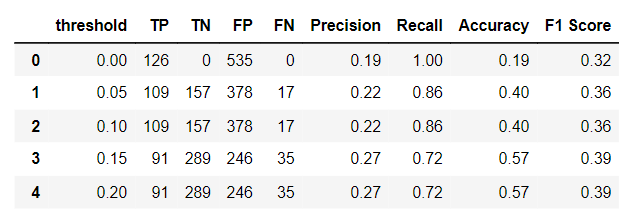

>- The model should atleast predict the flight as delayed only with 20% prob of being delayed. Though it can vary upon airline to airline but, as per my opinion the threshold should be 20%. (less than 20% threshold gives the same recall which is the primary evaluation measure for this problem. 
Higher probability threshold incure more cost involved in wrong predictions. But from an airline's perspective, with lower delay prediciton threshold, there will be less cost (time cost, airport schedule for remaining flights/operations, customers eligibilty for insurance and payback amount) involved. Therefore is rather better to find a way to resume the operations in cases when the flight s classiefied as dealy and is on time rather than the other way round.

>- With the growing cost incurred by incorrect flight status in American aviation industry, it is very crutial to not compromise on predciting the delayed flights. However, for the on flight predicted as delayed, the airline can take small steps like rewarding the customers to avoid the customer dissatisfaction and keep up with the losses.

In [22]:
import pickle
pickle_out = open('classifier3', mode='wb')
pickle.dump([knn,features_means,features_std], pickle_out)
pickle_out.close()

In [24]:
%%writefile app3.py

import pickle
import streamlit as st
import math
import pandas as pd
import numpy as np

st.header("Flight Status Predicition")


pickle_in = open('classifier3', 'rb')
knn,features_means,features_std = pickle.load(pickle_in)

@st.cache()

# Define the function which will make the prediction using data
# inputs from users

def getColumnNames():
    return ['sch_dep_time', 'carrier_delta', 'carrier_us', 'carrier_envoy',
       'carrier_continental', 'carrier_discovery', 'carrier_other', 'dest_jfk',
       'dest_ewr', 'dest_lga', 'distance', 'origin_dca', 'origin_iad',
       'origin_bwi', 'bad_weather', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday']


def prediction(scheduled_departure_time, carrier, destination, distance,
               origin, weather, day):
    
    #initialization
    carriers = {'Delta':0,
                'US':0,
                'Envoy':0,
                'Continental':0,
                'Discovery':0,
                'Others':0}
    
    destinations = {'John F. Kennedy International Airport':0,
                    'Newark Liberty International Airport':0,
                    'LaGuardia Airport':0}
    
    origins = {'Ronald Reagan Washington National Airport':0,
                'Washington Dulles International Airport':0,
                'Baltimore/Washington International Thurgood Marshall Airport':0}
    
    days = {'Monday':0,
            'Tuesday':0,
            'Wednesday':0,
            'Thursday':0,
            'Friday':0,
            'Saturday':0,
            'Sunday':0}
               
    weather_list = {
        'Good':0,
        'Bad':1
    }    
    
    #value population
    for key in carriers:
        if key == carrier:
            carriers[key] = 1
            
    for key in destinations:
        if key == destination:
            destinations[key] = 1
            
    for key in origins:
        if key == origin:
            origins[key] = 1
               
    for key in days:
        if key == day:
            days[key] = 1
    
    my_test_df = pd.DataFrame([[scheduled_departure_time,
          carriers.get('Delta'),carriers.get('US'),carriers.get('Envoy'),carriers.get('Continental'),carriers.get('Discovery'),carriers.get('Others'),
          destinations.get('John F. Kennedy International Airport'),
          destinations.get('Newark Liberty International Airport'),
          destinations.get('LaGuardia Airport'),
          distance,
          origins.get('Ronald Reagan Washington National Airport'),
          origins.get('Washington Dulles International Airport'),
          origins.get('Baltimore/Washington International Thurgood Marshall Airport'),
          weather_list.get(weather),
          days.get('Monday'),days.get('Tuesday'),days.get('Wednesday'),days.get('Thursday'),days.get('Friday'),days.get('Saturday'),days.get('Sunday')
         ]], 
        columns=getColumnNames())

    
    # Make predictions
    prediction = knn.predict_proba(my_test_df)
    THRESHOLD = 0.22
    if prediction[0][1] > THRESHOLD:
        return 'Sorry the flight is delayed'
    else: 
        return 'Your flight is on time'

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    scheduled_departure_time = st.number_input("Scheduled Departure Time",
                                  min_value=0.0,
                                  max_value=24.0,
                                  value=12.5,
                                  step=0.5,
                                 )
               
    carrier = st.selectbox('Flight Carrier',
                             ('Delta','US','Envoy','Continental','Discovery','Others'))
    
    destination = st.selectbox('Destination',
                             ('John F. Kennedy International Airport', 'Newark Liberty International Airport', 'LaGuardia Airport'))
    
    distance = st.number_input("What is the distance traveled",
                                  min_value=150,
                                  max_value=240,
                                  value=200,
                                  step=10,
                                 )
    
    origin = st.selectbox('Origin',
                             ('Ronald Reagan Washington National Airport','Washington Dulles International Airport','Baltimore/Washington International Thurgood Marshall Airport'))
    
    weather = st.selectbox('Weather Condition',
                             ('Good','Bad'))
               
    day = st.selectbox('Day',
                             ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
               
    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Flight Status"):
        result = prediction(scheduled_departure_time, carrier, destination, distance,
               origin, weather, day)
        st.success(result)
        
if __name__=='__main__':
    main()

Overwriting app3.py


In [25]:
!streamlit run app3.py

^C
